In [1]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0,"/home/yonatan/PycharmProjects/qutip")
import LH_tools as LHT

In [2]:
import dorit.XXZZham as XXZZham

In [3]:
import adiabatic_sim 
n = 6
N = 2**n



id_n = tensor([qeye(2)]*n)
psi0 = tensor([basis(2,0)]*n)
psi0= hadamard_transform(n)*psi0
H_0 = id_n-psi0*psi0.trans()
rot_H0, rot_psi0 = LHT.rotate_by_had(H_0, psi0)
w = tensor([basis(2,0),
            basis(2,1),
            basis(2,0),
            basis(2,0),
            basis(2,1),
            basis(2,0)])
H_1 = id_n - w*w.trans()

##Using roland

eps = 0.3
s = lambda t : LHT.s_function(t,N,eps)
tmax = LHT.find_s_one(N,eps)
tlist = np.linspace(0, tmax , 10)

# P_mat, evals_mat,psis_mine = adiabatic_sim.sim_simple_adiabatic(tlist, H_0, H_1 ,s)

# LHT.plot_PandEV(P_mat, evals_mat, tlist)
# pass

In [4]:
import importlib


/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


135


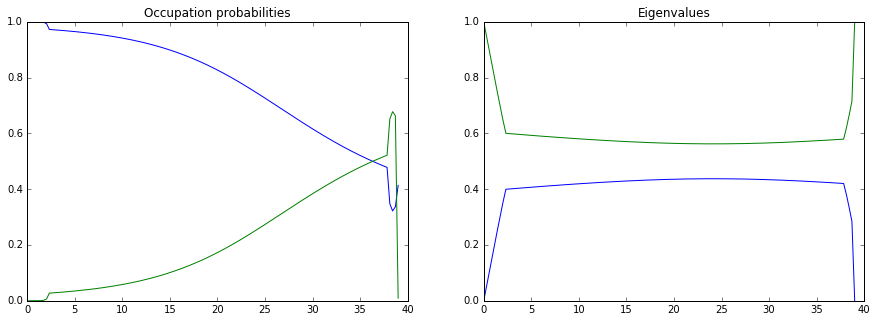

In [55]:
importlib.reload(adiabatic_sim)
tlist = adiabatic_sim.sim_dynamic_evolution_binsearch(H_0, H_1,0.9)
P_mat, evals_mat,psis_mine = adiabatic_sim.sim_simple_adiabatic(tlist, H_0, H_1)
LHT.plot_PandEV(P_mat, evals_mat, np.linspace(0,max(tlist),len(tlist)))
print(len(tlist))
pass

/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


258


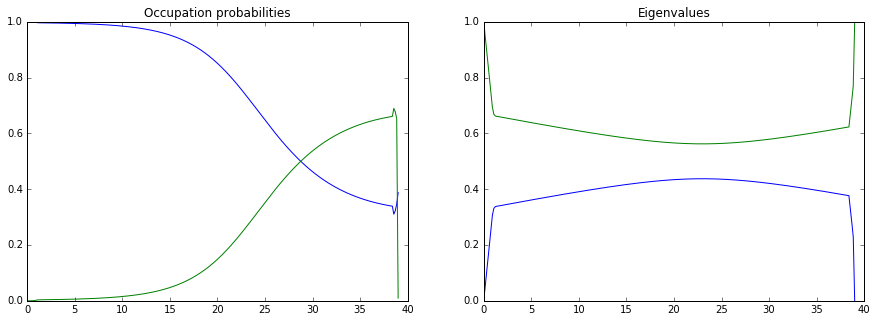

In [56]:
importlib.reload(adiabatic_sim)
tlist = adiabatic_sim.sim_dynamic_evolution_binsearch(H_0, H_1,0.1)
P_mat, evals_mat,psis_mine = adiabatic_sim.sim_simple_adiabatic(tlist, H_0, H_1)
LHT.plot_PandEV(P_mat, evals_mat, np.linspace(0,max(tlist),len(tlist)))
print(len(tlist))
pass

In [57]:
tlist

[1.95,
 3.9,
 5.85,
 7.8,
 9.75,
 11.7,
 13.649999999999999,
 14.624999999999998,
 14.868749999999999,
 14.929687499999998,
 14.960156249999999,
 14.999156249999999,
 15.038156249999998,
 15.077156249999998,
 15.116156249999998,
 15.155156249999997,
 15.194156249999997,
 15.233156249999997,
 15.272156249999997,
 15.311156249999996,
 15.350156249999996,
 15.389156249999996,
 15.428156249999995,
 15.467156249999995,
 15.506156249999995,
 15.545156249999994,
 15.584156249999994,
 15.623156249999994,
 15.662156249999994,
 15.701156249999993,
 15.740156249999993,
 15.779156249999993,
 15.818156249999992,
 15.857156249999992,
 15.896156249999992,
 15.935156249999991,
 15.974156249999991,
 16.01315624999999,
 16.052156249999992,
 16.091156249999994,
 16.130156249999995,
 16.169156249999997,
 16.20815625,
 16.24715625,
 16.28615625,
 16.325156250000003,
 16.364156250000004,
 16.403156250000006,
 16.442156250000007,
 16.48115625000001,
 16.52015625000001,
 16.55915625000001,
 16.598156250000013

/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


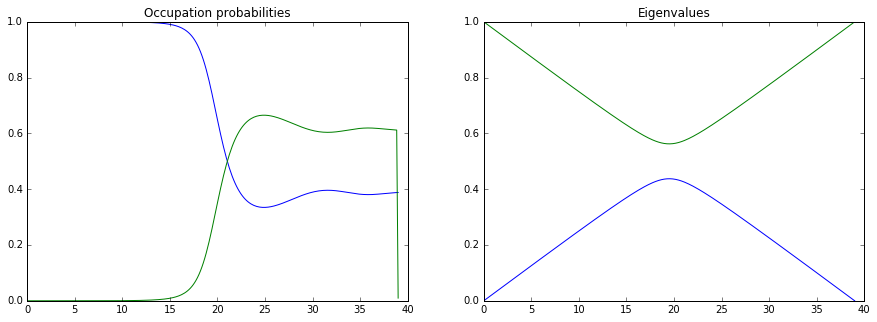

In [49]:
linlist = np.linspace(0,np.amax(tlist),len(tlist))
P_mat, evals_mat,psis_mine = adiabatic_sim.sim_simple_adiabatic(linlist, H_0, H_1)
LHT.plot_PandEV(P_mat, evals_mat, linlist)
pass


/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


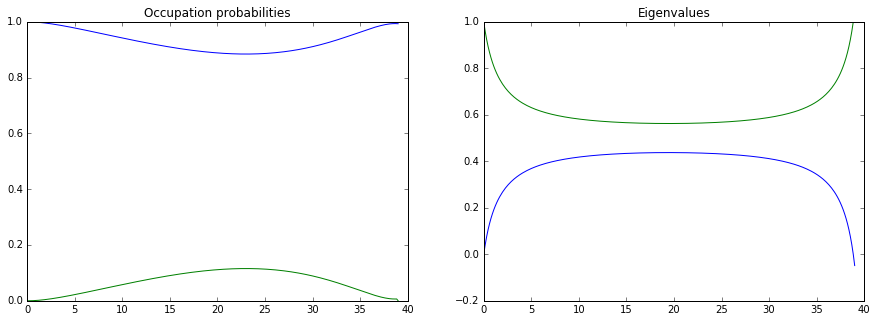

In [50]:
linlist = np.linspace(0,np.amax(tlist),len(tlist))
s = lambda t : LHT.s_function(t,N,eps)
P_mat, evals_mat,psis_mine = adiabatic_sim.sim_simple_adiabatic(linlist, H_0, H_1,s)
LHT.plot_PandEV(P_mat, evals_mat, linlist)
pass


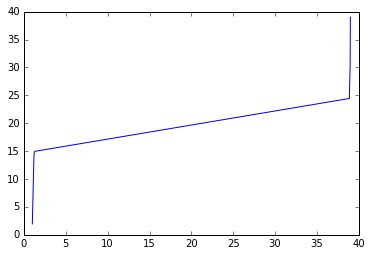

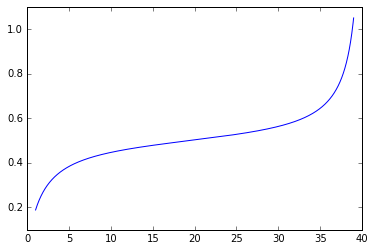

In [72]:
lin_space =  np.linspace(1,max(tlist),len(tlist))

plt.plot(lin_space, tlist)
plt.figure()
plt.plot(lin_space,LHT.s_function(lin_space,N,0.3))


This seems a bit like roland function , but the slope in the middle is too steep, so let's try shrinking the min step

/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


1229


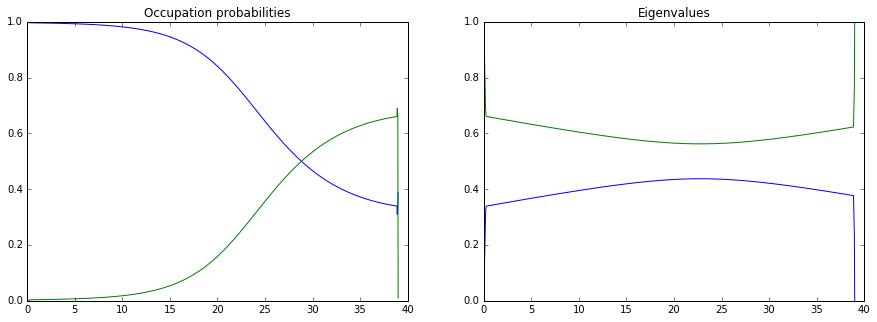

In [59]:
# when ran, I had min step = max_time /5000 intead of the  max_time / 1000 used above
importlib.reload(adiabatic_sim)
tlist = adiabatic_sim.sim_dynamic_evolution_binsearch(H_0, H_1,0.1)
P_mat, evals_mat,psis_mine = adiabatic_sim.sim_simple_adiabatic(tlist, H_0, H_1)
LHT.plot_PandEV(P_mat, evals_mat, np.linspace(0,max(tlist),len(tlist)))
print(len(tlist))
pass

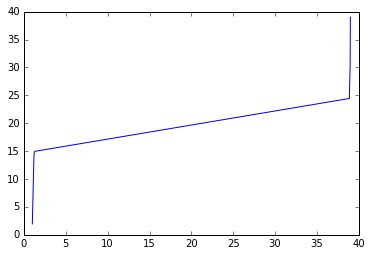

In [60]:
plt.plot(np.linspace(1,max(tlist),len(tlist)), tlist)


Okay that didn't help, mabe just use the s_function defined by the search with tlist?

/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


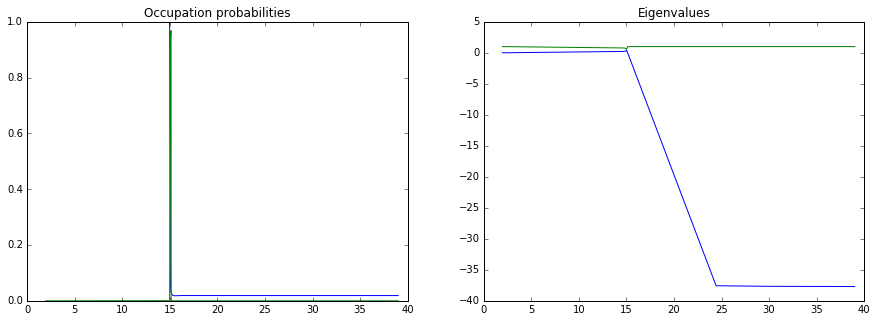

In [82]:
linlist = np.linspace(0,np.amax(tlist),len(tlist))
def s_from_tlist(x,count = []):
    return linlist[tlist.index(x)]
    
P_mat, evals_mat,psis_mine = adiabatic_sim.sim_simple_adiabatic(tlist, H_0, H_1,s_from_tlist)
LHT.plot_PandEV(P_mat, evals_mat, tlist)
pass

5.85